# EE559 Project Assignment 
## Student Perfromance Dataset / Classification

###   Reference Systems
###   Imports

In [12]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Functions

In [2]:
#Fucntion to convert scores to grades
def get_grade(score): 
    if score <= 9:
        grade = 'F'
    elif 10<=score<=11:
        grade = 'D'
    elif 12<=score<=13:
        grade = 'C'
    elif 14<=score<=15:
        grade = 'B'
    elif score>=16:
        grade = 'A'
    
    return grade

#Trivial Classifier - always outputs the mean output value from the training set.
def trivial_classifier(test_data, train_data_mean_grade):
    Y_pred = list()
    for i in range(len(test_data)):
        Y_pred.append(train_data_mean_grade)
    return np.array(Y_pred)

### Read in the data

In [3]:
train_df = pd.read_csv('data/student_performance_test.csv')
#dataset_train = train_df.to_numpy()

In [4]:
train_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#### Trivial System

#### Removing categorical non-binary features and grades. 

In [5]:
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_train = binary_vals.to_numpy() #Converting to numpy array for easier processing

In [6]:
y_train = train_df.loc[:, train_df.columns.isin(['G1'])] #Rerun this cell to get back orginal values of Y_train
Y_train = y_train['G1'].to_numpy()

In [7]:
Y_mean = Y_train.mean()
Y_grade_mean = get_grade(round(Y_mean))
print("Mean grade is - ", Y_grade_mean)

Mean grade is -  D


In [8]:
y_grades_train = list()
for i in range(len(Y_train)):
    y_grades_train.append(get_grade(Y_train[i]))
y_grades_train = np.array(y_grades_train)

#### Reading in test data and processing it

In [9]:
test_df = pd.read_csv('data/student_performance_test.csv')
selected_columns = train_df.loc[:, ~train_df.columns.isin(['Mjob', 'Fjob', 'reason', 'gaurdian', 'G1', 'G2', 'G3'])]
binary_vals = pd.get_dummies(selected_columns)
X_test = binary_vals.to_numpy()

In [14]:
y_test = train_df.loc[:, train_df.columns.isin(['G1'])] #Rerun this cell to get back orginal values of Y_test
Y_test = y_test['G1'].to_numpy()

In [19]:
y_grades_test_actual = list()
for i in range(len(Y_test)):
    y_grades_test_actual.append(get_grade(Y_test[i]))
Y_test_grades_actual = np.array(y_grades_test_actual)

In [20]:
Y_test_grades_pred = trivial_classifier(X_test, Y_grade_mean)

In [21]:
trivial_cf_matrix = confusion_matrix(Y_test_grades_actual, Y_test_grades_pred)
print(trivial_cf_matrix)

[[ 0  0  0 12  0]
 [ 0  0  0 27  0]
 [ 0  0  0 39  0]
 [ 0  0  0 48  0]
 [ 0  0  0 37  0]]


[Text(0, 0.5, 'A'),
 Text(0, 1.5, 'B'),
 Text(0, 2.5, 'C'),
 Text(0, 3.5, 'D'),
 Text(0, 4.5, 'F')]

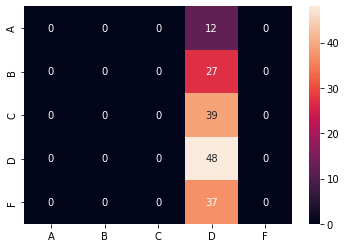

In [26]:
import seaborn as sns
labels = ['A', 'B', 'C', 'D', 'F']
ax = sns.heatmap(trivial_cf_matrix, annot=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)